In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
df = pd.read_csv('IMDB Dataset.csv')

In [45]:
count = df.groupby('sentiment').count().reset_index()

In [46]:
count

,sentiment,review
0,negative,25000
1,positive,25000


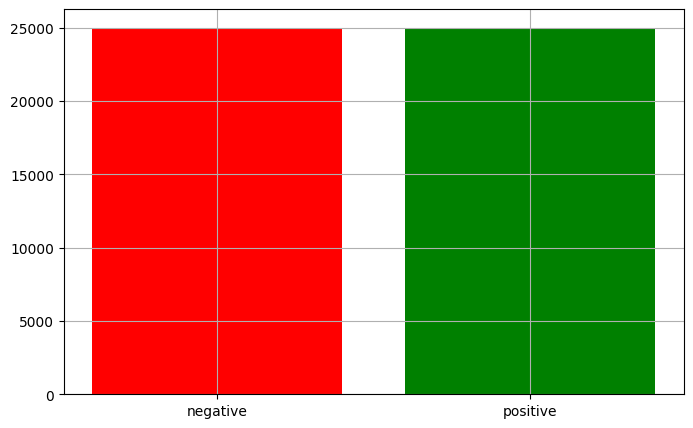

In [47]:
plt.figure(figsize=(8, 5))
plt.bar(count['sentiment'] , count['review'], color=['red', 'green'])
plt.grid(True)

### As you see, we have a balanced dataset. However, unfortunately, in most cases, we will have a lot of data for one class and much fewer for other classes. So, for this example, we are going to take 15,000 examples for positive and 5,000 for negative examples.

In [48]:
positive_examples = df[df['sentiment'] == 'positive'].head(15000)
negative_examples = df[df['sentiment'] == 'negative'].head(5000)
df_train_model = pd.concat([positive_examples, negative_examples])
print(positive_examples.shape, negative_examples.shape)

(15000, 2) (5000, 2)


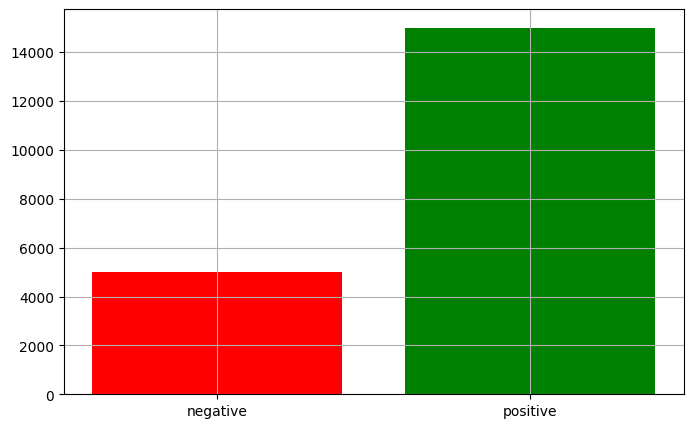

In [49]:
count = df_train_model.groupby('sentiment').count().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(count['sentiment'] , count['review'], color=['red', 'green'])
plt.grid(True)

### before to train a model we going to clean and prepare the data, so for this step we will delete and convert all the words in lowercase and delete words that don't include semantic value

In [50]:
nltk.download('stopwords') # download empty words and common words that dont apport any meaning or value to the text
stop_words = set(stopwords.words('english')) # We define the stopwords in spanish
nltk.download('punkt') # divided the text into words or sentences 
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josevega/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/josevega/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
def preprocess_text(text):
    text = text.lower() # convert the text to lowercase
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
    tokens = word_tokenize(text) # tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # lemmatize the text
    return ' '.join(tokens)

df_train_model['review_cleaned'] = df_train_model['review'].apply(preprocess_text)


In [56]:
#  First we going to vectorize the words 
vectorizer = TfidfVectorizer(max_features= 3000)
X = vectorizer.fit_transform(df_train_model['review_cleaned'])
y = df_train_model['sentiment'] 

In [59]:
# now We apply subsampling

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1447777 stored elements and shape (20000, 3000)>